In [1]:
import pandas as pd
import sqlalchemy as sa
import pyodbc
import numpy as np

In [6]:
engine = sa.create_engine('mssql+pyodbc://(localdb)\MSSQLLocalDB/vpolyanchikov?driver=ODBC Driver 17 for SQL Server')

In [8]:
def read_sql(query, engine):
    df = pd.read_sql_query(query, engine)
    engine.dispose()
    return df

In [9]:
def execute_sql(query, engine):
    conn = engine.connect()
    result = conn.execute(query + "; commit;")
    engine.dispose()
    return result

In [10]:
def to_sql(df, tables, engine, schema='dbo',if_exist='append'):
    df.to_sql(name=tables, con=engine,
                  schema=schema, if_exists=if_exist, index=0)
    engine.dispose()
    return

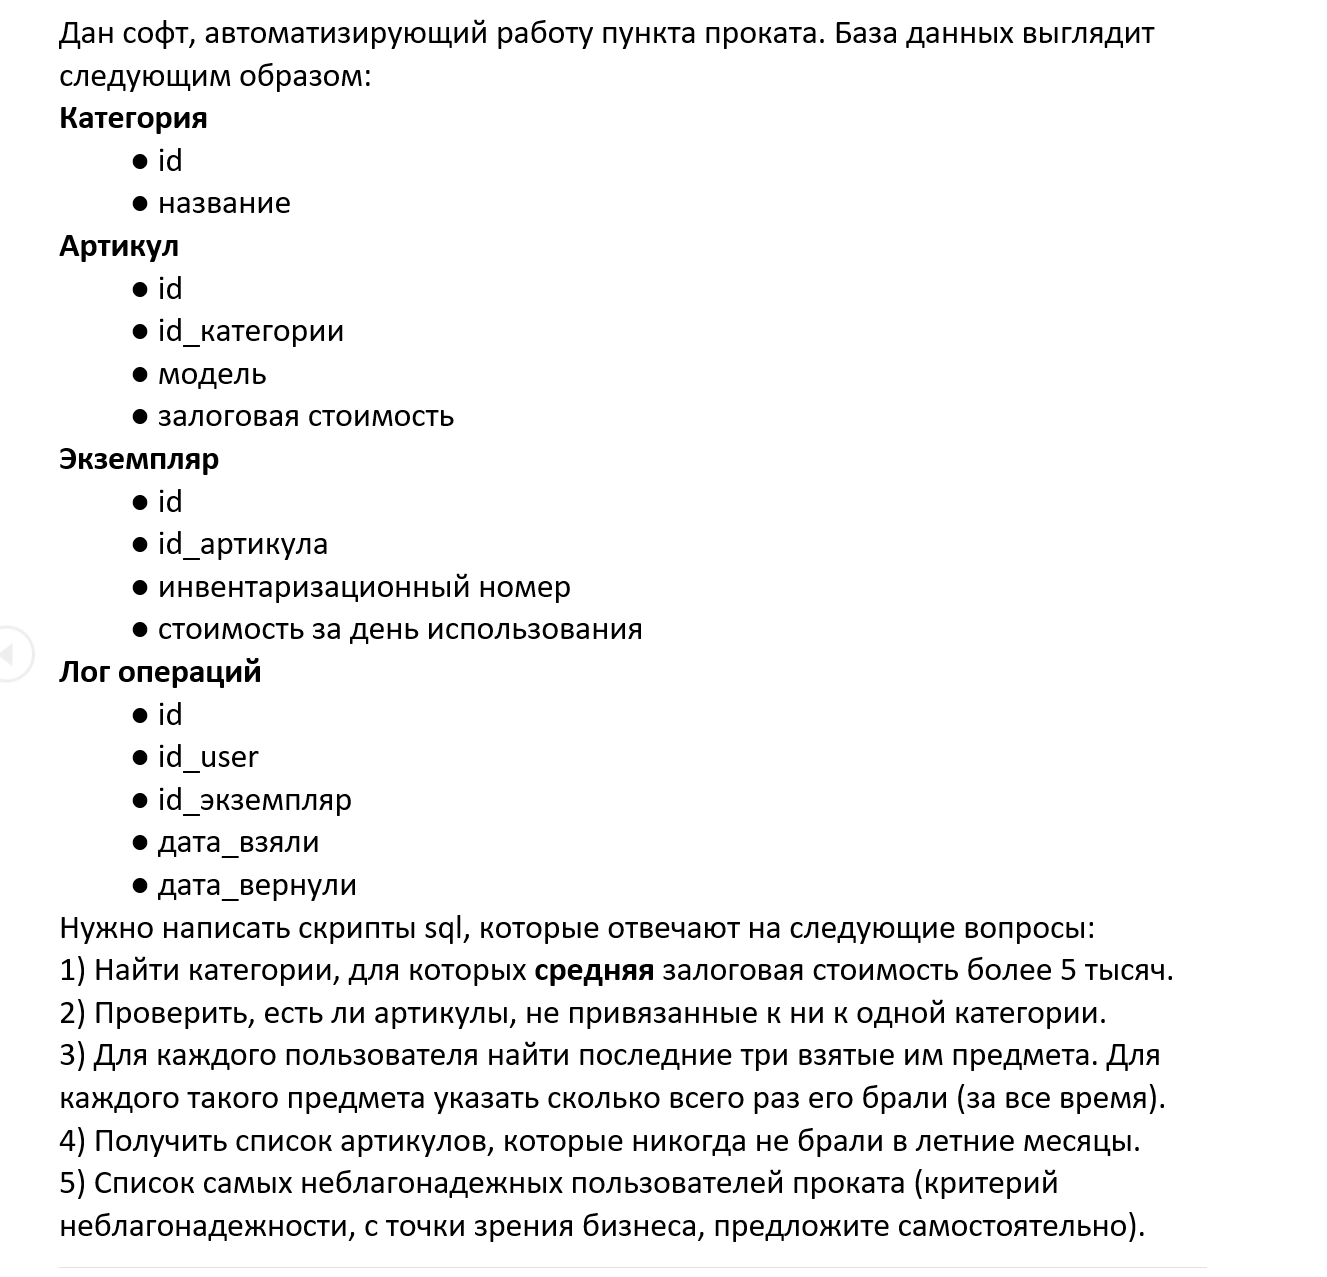

In [1]:
from PIL import Image
Image.open('Задание_3_и_4.png')

## Необходимо сделать задачи 3 и 4

### Задание 3.

#### Ниже наполнение таблиц и запрос

In [23]:
dfs = pd.read_excel('dfs.xlsx', sheet_name ='logs3')

In [24]:
dfs

,id,id_user,id_examplar,date_took,date_returned
0,1,1,1,2022-08-01,2022-08-01
1,2,1,2,2022-04-02,2022-04-02
2,3,1,3,2022-05-03,2022-05-03
3,4,1,4,2022-08-02,2022-08-02
4,5,1,1,2020-04-02,2020-04-02
5,6,1,5,2021-05-03,2021-05-03
6,7,2,1,2022-04-04,2022-04-04
7,8,2,1,2022-12-05,2022-12-05
8,9,2,4,2022-08-06,2022-08-06
9,10,2,3,2022-04-04,2022-04-04


In [28]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             18 non-null     int64         
 1   id_user        18 non-null     int64         
 2   id_examplar    18 non-null     int64         
 3   date_took      18 non-null     datetime64[ns]
 4   date_returned  18 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(3)
memory usage: 848.0 bytes


In [25]:
execute_sql("""CREATE TABLE logs3
                (id int primary key,
                id_user int,
                id_examplar int,
                date_took datetime,
                date_returned datetime)
                """, engine)

In [29]:
to_sql(dfs, 'logs3', engine)

In [30]:
df_3 = read_sql("""WITH a AS
  (SELECT id_examplar,
          date_took,
          id_user,
          ROW_NUMBER() OVER(PARTITION BY id_user
                            ORDER BY date_took DESC) [row_number]
   FROM dbo.logs3) 
SELECT id_examplar ,
       count(id_examplar) AS cnt_times_taken
FROM dbo.logs3
WHERE id_examplar in
    (SELECT id_examplar
     FROM a
     WHERE row_number in (1, 2, 3))
GROUP BY id_examplar
ORDER BY cnt_times_taken DESC;""", engine)

In [31]:
df_3

,id_examplar,cnt_times_taken
0,3,5
1,4,4
2,1,4
3,5,3


### Задание 4. 

#### Ниже наполнение таблиц и запрос

In [11]:
df = pd.read_excel('dfs.xlsx', sheet_name ='logs')

In [12]:
df

,id,id_user,id_examplar,date_took,date_returned
0,1,1,1,2022-08-01,2022-08-01
1,2,1,2,2022-04-02,2022-04-02
2,3,1,3,2022-05-03,2022-05-03
3,4,2,1,2022-04-04,2022-04-04
4,5,2,1,2022-12-05,2022-12-05
5,6,2,4,2022-08-06,2022-08-06
6,7,3,1,2022-08-07,2022-08-07
7,8,3,2,2022-03-08,2022-03-08
8,9,3,3,2022-01-09,2022-01-09
9,10,4,4,2022-08-10,2022-08-10


In [13]:
execute_sql("""CREATE TABLE logs4
                (id int primary key,
                id_user int,
                id_examplar int,
                date_took datetime,
                date_returned datetime)
                """, engine)

In [14]:
to_sql(df, 'logs4', engine)

In [15]:
df = pd.read_excel('dfs.xlsx', sheet_name ='articles')

In [16]:
df

,id,id_article,inventory_no,price
0,1,bc3,123,500
1,2,ab1,345,500
2,3,de7,64,500
3,4,fg4,5464,500
4,5,st5,345,500


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            5 non-null      int64 
 1   id_article    5 non-null      object
 2   inventory_no  5 non-null      int64 
 3   price         5 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 288.0+ bytes


In [18]:
execute_sql("""CREATE TABLE examplars4
                (id int primary key,
                id_article varchar(30),
                inventory_no int,
                price int)
                """, engine)

In [19]:
to_sql(df, 'examplars4', engine)

#### Результирующий запрос для задачи 4

In [20]:
df_4 = read_sql("""WITH a AS
  (SELECT id_examplar ,
          COUNT(id_examplar) OVER(PARTITION BY id_examplar) AS used_in_summer
   FROM dbo.logs4
   WHERE month(date_took) in (6, 7, 8))
SELECT id_article
FROM dbo.examplars4
WHERE id not in
    (SELECT DISTINCT id_examplar
     FROM a);""", engine)

In [21]:
df_4

,id_article
0,ab1
1,de7
